![Tesla Logo](https://www.logo.wine/a/logo/Tesla%2C_Inc./Tesla%2C_Inc.-Logo.wine.svg)

**GIỚI THIỆU**

Tesla, Inc. (Tesla) là một công ty công nghệ ô tô và năng lượng có trụ sở tại Palo Alto, California, Hoa Kỳ. Công ty chuyên thiết kế, sản xuất và tiếp thị các xe điện, các giải pháp lưu trữ năng lượng và các sản phẩm công nghệ liên quan. Danh mục sản phẩm của Tesla bao gồm các dòng xe điện đa dụng như Model S, Model 3, Model X và Model Y, cùng với các sản phẩm lưu trữ năng lượng như hệ thống pin Powerwall và Powerpack. Tesla cũng sản xuất và phân phối các thành phần và hệ thống ô tô điện cho các nhà sản xuất khác. Tesla là một trong những công ty tiên phong trong lĩnh vực ô tô điện và năng lượng tái tạo. Công ty luôn đẩy mạnh nghiên cứu và phát triển các công nghệ mới nhằm giảm khí thải và thúc đẩy sử dụng năng lượng sạch. Tesla cung cấp các sản phẩm và dịch vụ của mình thông qua mạng lưới các đại lý bán hàng trên toàn cầu, cùng với trang web chính thức và các cửa hàng bán lẻ.

Trong đoạn code sau, chúng em đã thực hiện Trực quan hóa Dữ liệu và Phân tích Giá cổ phiếu của Công ty Amazon. Hiển thị khi giá cả tăng hoặc giảm, tương quan giữa các giá trị và các thông tin hữu ích khác. Trong quá trình này, chúng em sử dụng các thư viện kỹ thuật như Pandas, NumPy, Matplotlib và Seaborn.

**Import Thư Viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc Dataset**

In [2]:
TSLA = pd.read_csv('./dataset/tsla_raw_data.csv')


**Thông Tin Cơ Bản về Dataset**

In [3]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3416 non-null   object 
 1   open            3416 non-null   float64
 2   high            3416 non-null   float64
 3   low             3416 non-null   float64
 4   close           3416 non-null   float64
 5   volume          3416 non-null   int64  
 6   adjusted_close  3416 non-null   float64
 7   change_percent  3415 non-null   float64
 8   avg_vol_20d     3397 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 240.3+ KB


In [4]:
# Kiểm Tra Các Cột
TSLA.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

In [5]:
# Kiểm Tra số lượng các cột và hàng
TSLA.shape

(3416, 9)

In [6]:
# Hiển thị 10 hàng đầu tiên
TSLA[0:10]

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN
5,2010-07-07,16.4001,16.6299,14.9799,15.8001,6924913,1.0533,-1.93,NaN
6,2010-07-08,16.1400,17.5200,15.5700,17.4600,7719539,1.1640,10.51,NaN
7,2010-07-09,17.5800,17.9001,16.5501,17.4000,4058605,1.1600,-0.34,NaN
8,2010-07-12,17.9499,18.0699,17.0001,17.0499,2203569,1.1367,-2.01,NaN
9,2010-07-13,17.3940,18.6399,16.8999,18.1401,2680059,1.2093,6.39,NaN


In [7]:
# hiển thị các hàng cuối
TSLA.tail()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
3411,2024-01-18,216.88,217.45,208.7400,211.88,108595398,211.88,-1.70,1.046542e+08
3412,2024-01-19,209.99,213.19,207.5600,212.19,102260305,212.19,0.15,1.044304e+08
3413,2024-01-22,212.26,217.80,206.2700,208.80,117952492,208.80,-1.60,1.040732e+08
3414,2024-01-23,211.30,215.65,207.7516,209.14,106605906,209.14,0.16,1.039238e+08
3415,2024-01-24,211.88,212.73,206.7700,207.83,123369932,207.83,-0.63,1.054237e+08


In [8]:
# Kiểm tra số lượng giá trị null
TSLA.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

In [9]:
(TSLA.isnull().sum()).values

array([ 0,  0,  0,  0,  0,  0,  0,  1, 19], dtype=int64)

In [10]:
# Drop các hàng null nếu có
TSLA_u = TSLA.dropna(how="all")
TSLA_u

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN
...,...,...,...,...,...,...,...,...,...
3411,2024-01-18,216.8800,217.4500,208.7400,211.8800,108595398,211.8800,-1.70,1.046542e+08
3412,2024-01-19,209.9900,213.1900,207.5600,212.1900,102260305,212.1900,0.15,1.044304e+08
3413,2024-01-22,212.2600,217.8000,206.2700,208.8000,117952492,208.8000,-1.60,1.040732e+08
3414,2024-01-23,211.3000,215.6500,207.7516,209.1400,106605906,209.1400,0.16,1.039238e+08


**TRỰC QUAN HÓA**

In [11]:
# Lấy tập dữ liệu từ năm 2011 đến năm 2023
TSLA_11_23 = TSLA_u[(TSLA_u['date'] >= '2011-01-01') & (TSLA_u['date'] <= '2023-12-31')]

************************************************
 1284083      1
4802668      1
8559703      1
5054413      1
5420726      1
            ..
9455908      1
4668235      1
5672261      1
6363428      1
100891602    1
Name: volume, Length: 3270, dtype: int64 
************************************************


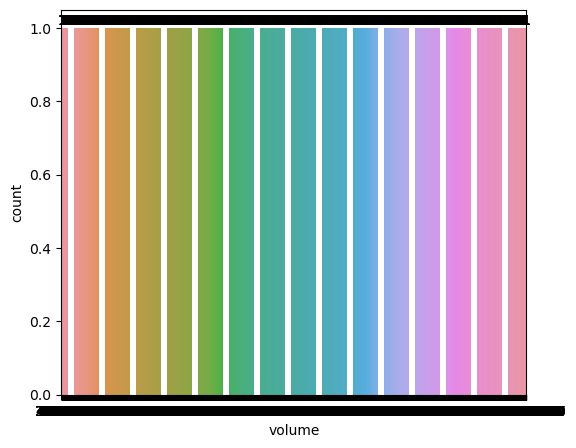

In [12]:
print('************************************************\n',TSLA_11_23['volume'].value_counts(), '\n************************************************')
plt.figure(figsize=(6,5))

ax = sns.countplot(data=TSLA_11_23, x='volume')
ax.bar_label(ax.containers[0])
plt.show()

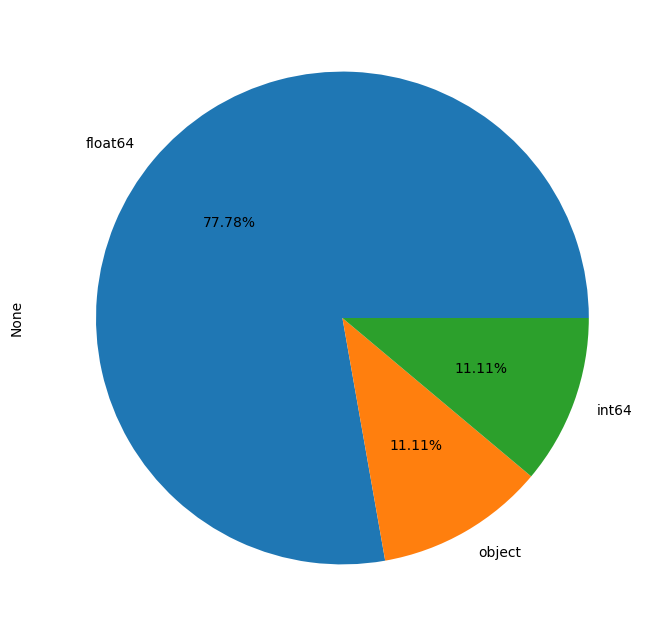

In [13]:
plt.figure(figsize=(8,8))
TSLA_11_23.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

3270

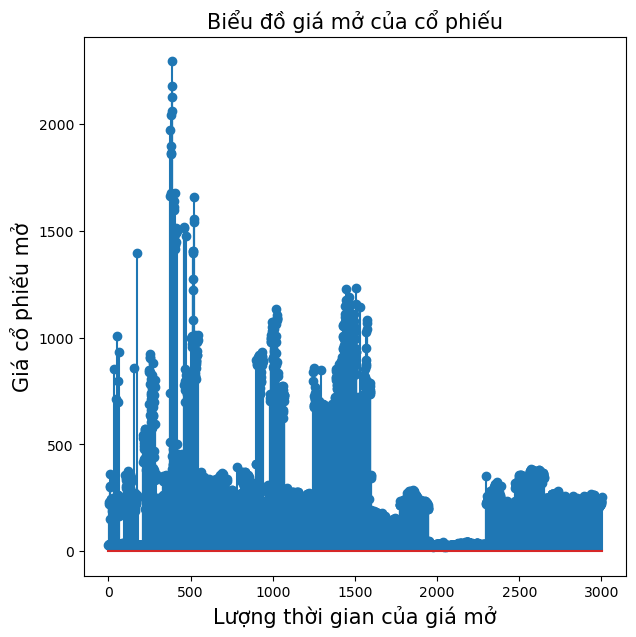

In [14]:
# Hiển thị giá trị tăng và giảm thông qua biểu đồ stem
plt.figure(figsize=(7,7))
plt.stem(list(TSLA_11_23['open'].value_counts().keys()))
plt.xlabel("Lượng thời gian của giá mở", fontsize=15)
plt.ylabel("Giá cổ phiếu mở", fontsize=15)
plt.title("Biểu đồ giá mở của cổ phiếu", fontsize=15)
plt.show
(TSLA_11_23['open'].value_counts()).sum()

3270

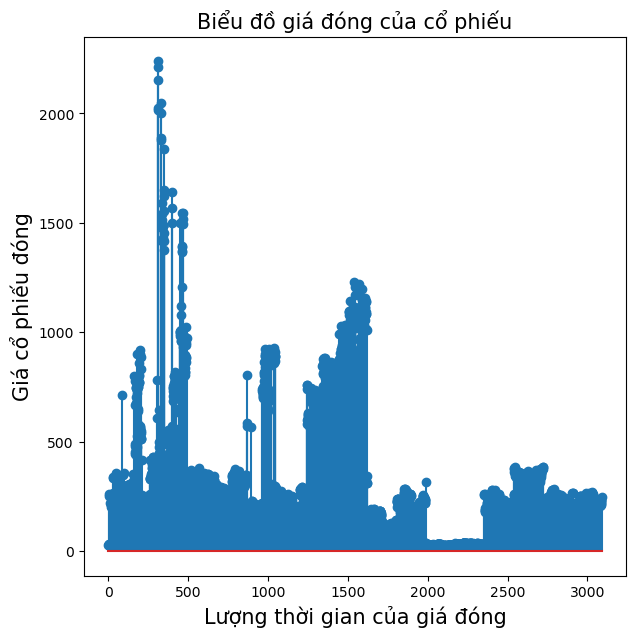

In [15]:
# Thể hiện sự tăng giảm của giá trị thông qua biểu đồ stem
plt.figure(figsize=(7,7))
plt.stem(list(TSLA_11_23['close'].value_counts().keys()))
plt.xlabel("Lượng thời gian của giá đóng", fontsize=15)
plt.ylabel("Giá cổ phiếu đóng", fontsize=15)
plt.title("Biểu đồ giá đóng của cổ phiếu", fontsize=15)
plt.show
(TSLA_11_23['close'].value_counts()).sum()

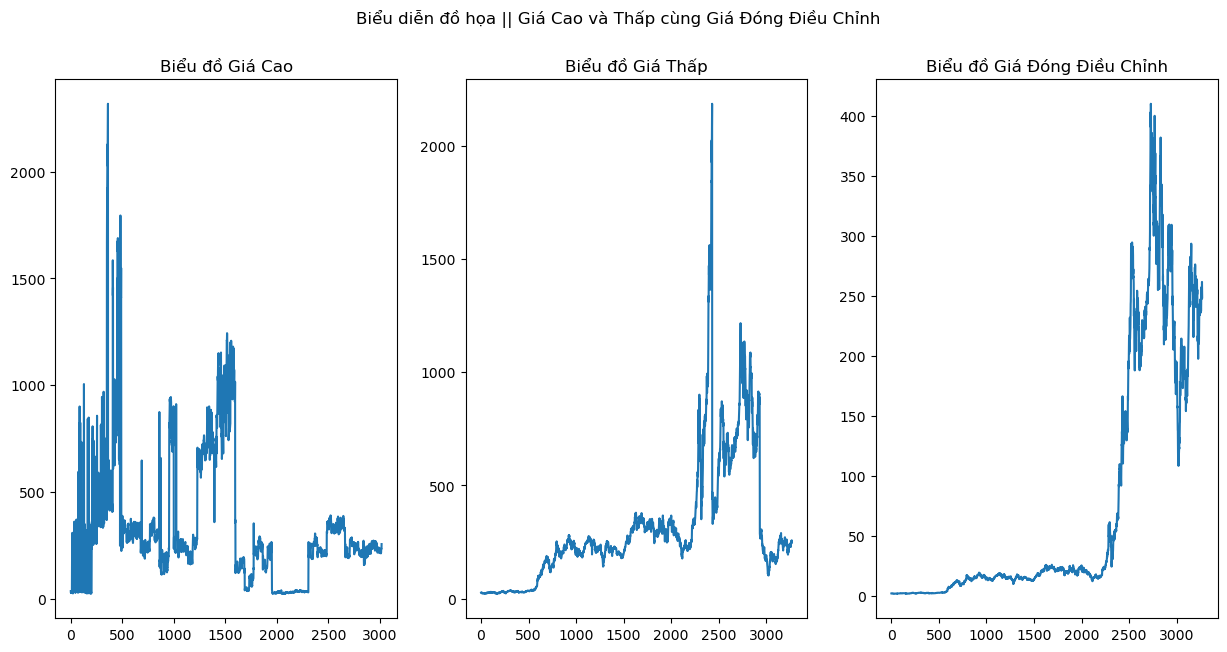

In [16]:
# these plots shows Up and Down values
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(list(TSLA_11_23['high'].value_counts().keys()))
plt.title("Biểu đồ Giá Cao")
plt.subplot(132)
plt.plot(list(TSLA_11_23['low']))
plt.title("Biểu đồ Giá Thấp")
plt.subplot(133)
plt.plot(list(TSLA_11_23['adjusted_close']))
plt.title("Biểu đồ Giá Đóng Điều Chỉnh")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Thấp cùng Giá Đóng Điều Chỉnh")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

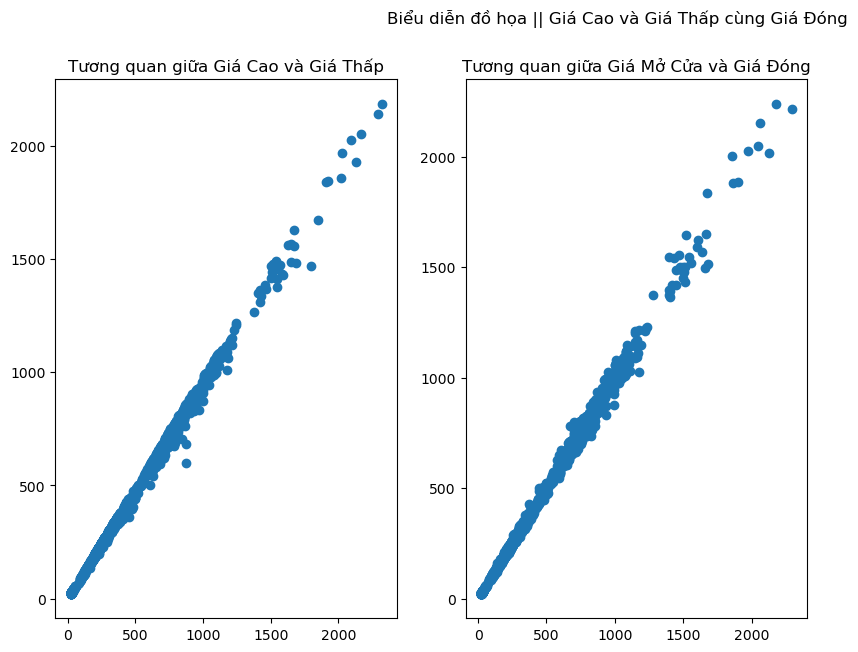

In [17]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.scatter(list(TSLA_11_23['high']), list(TSLA_11_23['low']))
plt.title("Tương quan giữa Giá Cao và Giá Thấp")
plt.subplot(132)
plt.scatter(list(TSLA_11_23['open']), TSLA_11_23['close'])
plt.title("Tương quan giữa Giá Mở Cửa và Giá Đóng")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

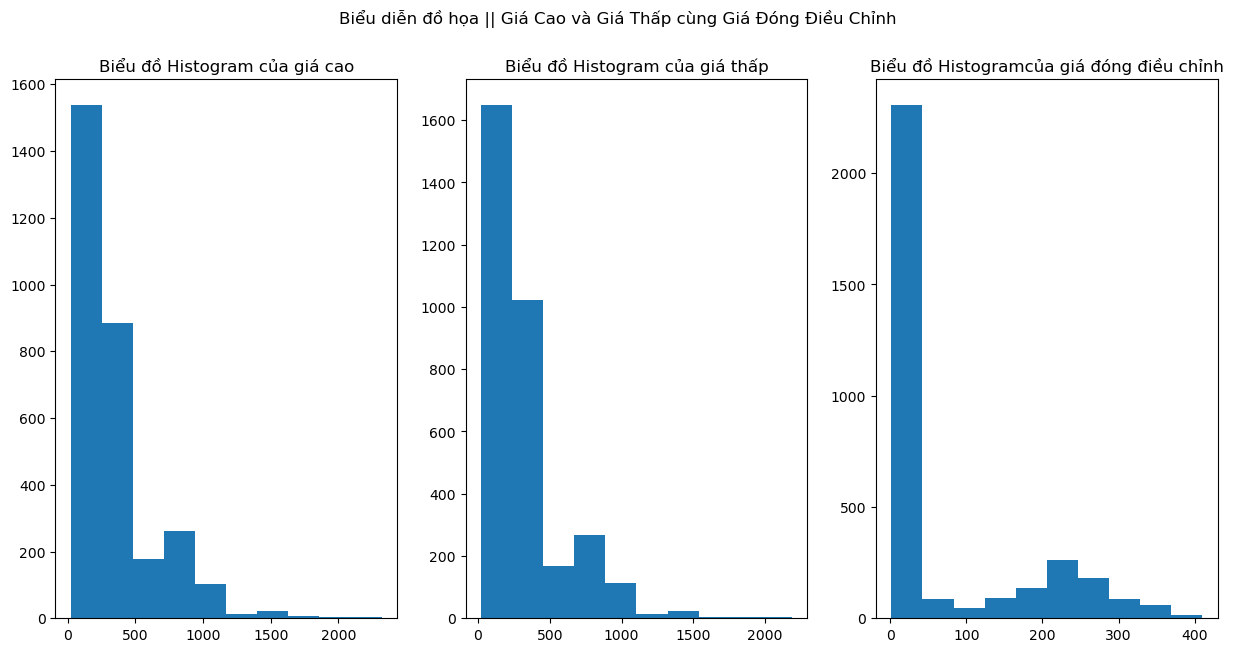

In [18]:
# These graphs shows ranges 
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.hist(list(TSLA_11_23['high'].value_counts().keys()))
plt.title("Biểu đồ Histogram của giá cao")
plt.subplot(132)
plt.hist(list(TSLA_11_23['low']))
plt.title("Biểu đồ Histogram của giá thấp")
plt.subplot(133)
plt.hist(list(TSLA_11_23['adjusted_close']))
plt.title("Biểu đồ Histogramcủa giá đóng điều chỉnh")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng Điều Chỉnh")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

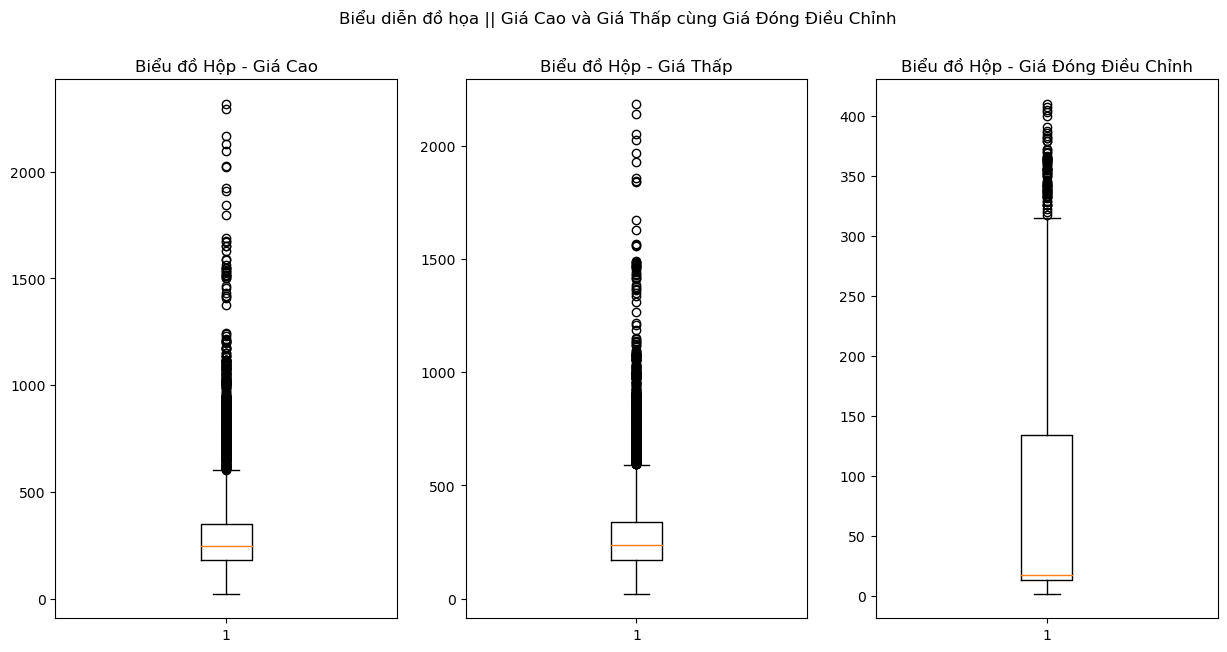

In [19]:
# Tạo một hình vẽ với kích thước 15x7 inch
plt.figure(figsize=(15, 7))

# Biểu đồ hộp cho giá cao (high)
plt.subplot(131)
plt.boxplot(list(TSLA_11_23['high']))
plt.title("Biểu đồ Hộp - Giá Cao")

# Biểu đồ hộp cho giá thấp (low)
plt.subplot(132)
plt.boxplot(list(TSLA_11_23['low']))
plt.title("Biểu đồ Hộp - Giá Thấp")

# Biểu đồ hộp cho giá đóng cửa điều chỉnh (adjusted_close)
plt.subplot(133)
plt.boxplot(list(TSLA_11_23['adjusted_close']))
plt.title("Biểu đồ Hộp - Giá Đóng Điều Chỉnh")

# Tiêu đề chính của toàn bộ biểu đồ
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng Điều Chỉnh")

# Hiển thị biểu đồ
plt.show()

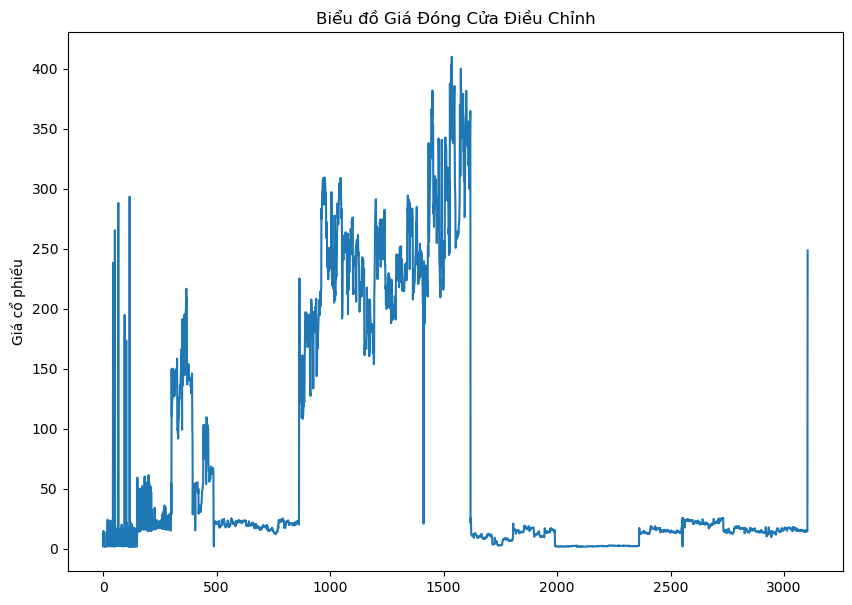

In [20]:
# Đồ thị này thể hiện các giá trị Giá Đóng Điều Chỉnh tăng và giảm.
plt.figure(figsize=(10, 7))
plt.plot(list(TSLA_11_23['adjusted_close'].value_counts().keys()))
plt.ylabel("Giá cổ phiếu")
plt.title("Biểu đồ Giá Đóng Cửa Điều Chỉnh")
plt.show()

<AxesSubplot:ylabel='high'>

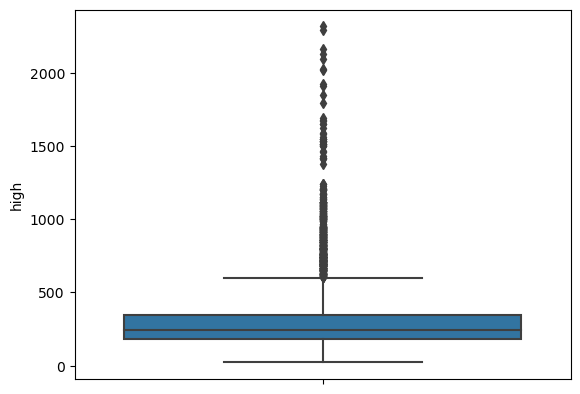

In [21]:
sns.boxplot(y="high", data=TSLA_11_23)

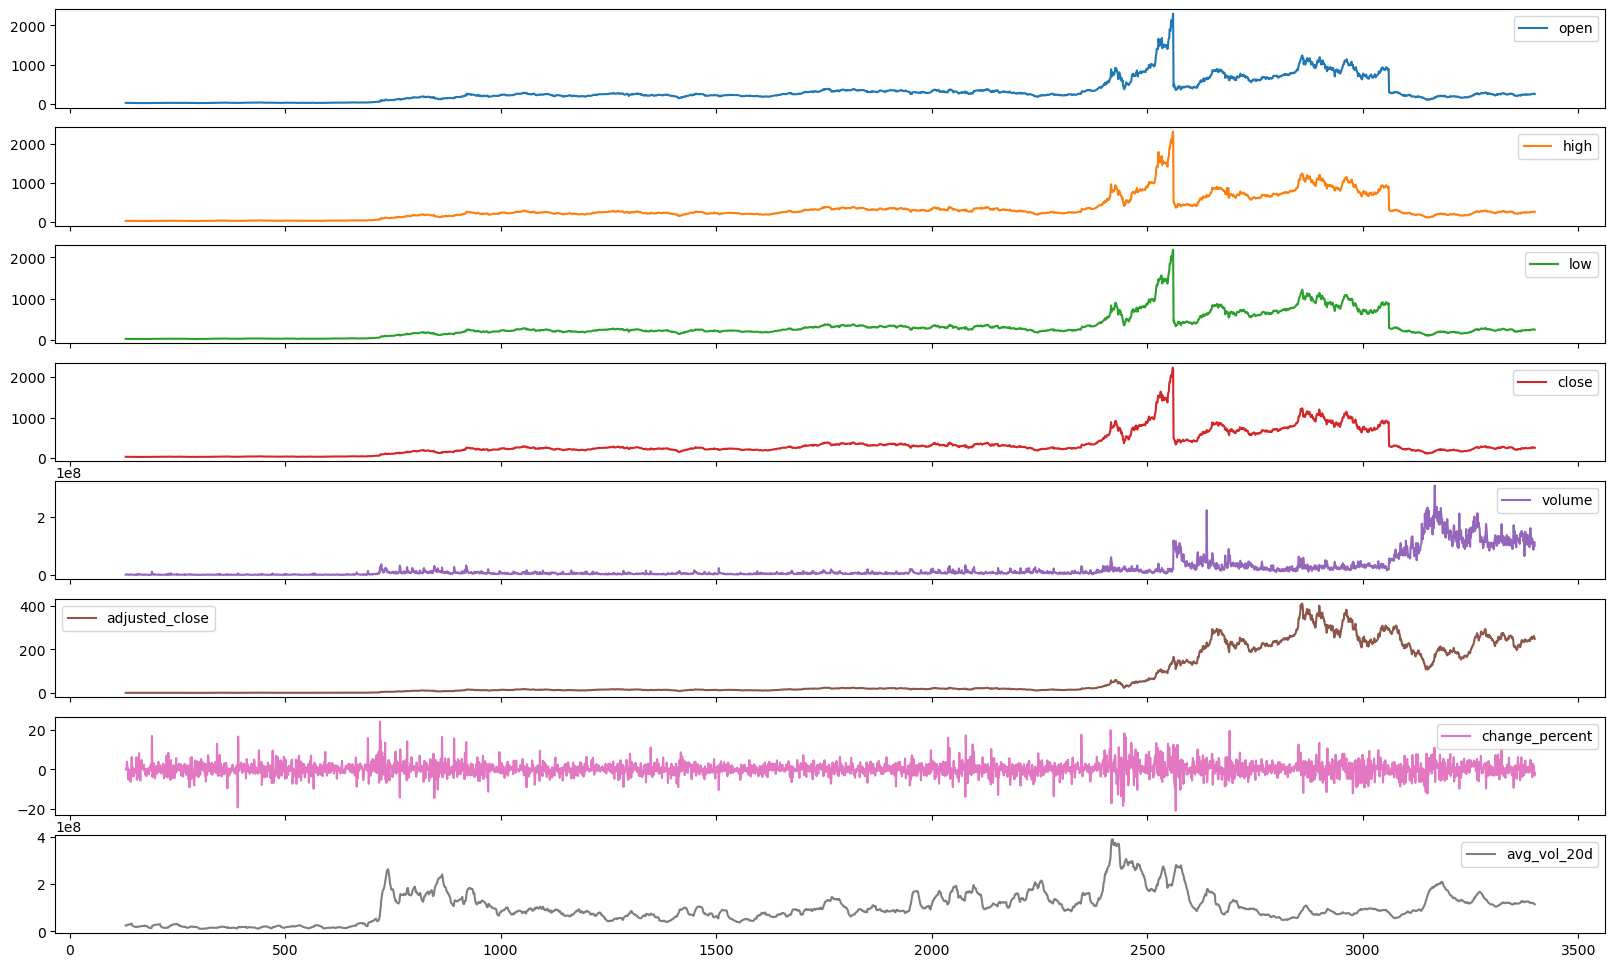

In [22]:
#Thể hiện sự tăng trưởng của từng cột
TSLA_11_23.plot(subplots=True, figsize=(20,12))
plt.show()

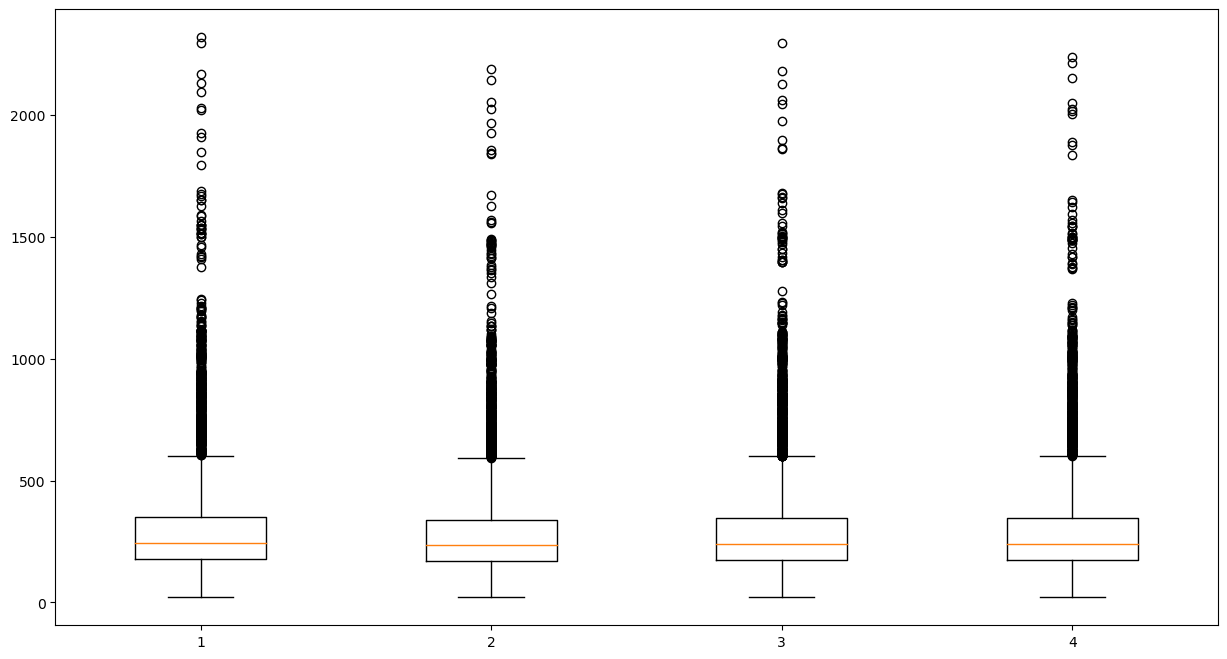

In [23]:
box_data = TSLA_11_23[['high', 'low', 'open', 'close']]

plt.figure(figsize=(15,8))
plt.boxplot(box_data)
plt.show()

In [24]:
a = TSLA_11_23['open'][10390:10409]
b = TSLA_11_23['close'][10390:10409]

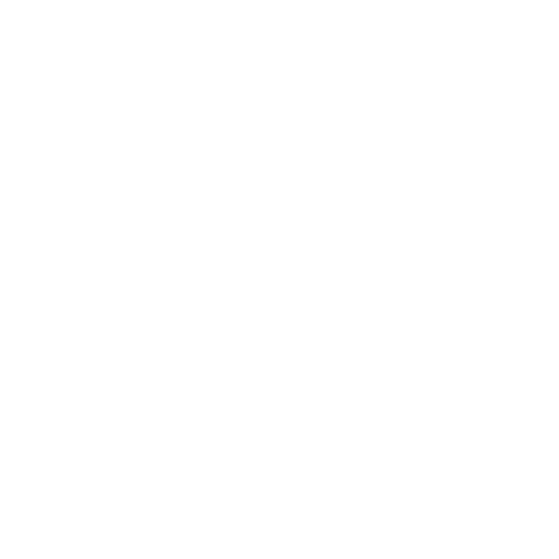

In [25]:
# Đây đang được hiển thị dưới dạng phần trăm.
plt.figure(figsize=(10, 7))
plt.pie((a.value_counts().keys()), (b.value_counts()), autopct='%0.2f%%')
plt.show()

**Statistical Methods**

In [26]:
# here we are summarize stats 
TSLA_11_23.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000,3270.000000,3.270000e+03
mean,319.418282,326.463907,312.124178,319.480969,2.272185e+07,73.214104,0.213511,9.956511e+07
std,291.667257,299.779103,283.386279,291.867205,3.954417e+07,102.525613,3.539641,6.320007e+07
min,21.780000,22.269900,21.110100,21.830100,2.395950e+05,1.455300,-21.060000,1.120778e+07
25%,174.764925,179.139600,169.442400,174.510000,3.546867e+06,12.573525,-1.537500,6.006235e+07
50%,241.065000,244.599900,236.085600,241.170000,7.060674e+06,17.389350,0.130000,8.997002e+07
75%,344.760075,349.155075,338.090100,344.392500,2.056269e+07,134.085825,1.910000,1.293361e+08
max,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08,409.970000,24.400000,3.886315e+08


In [27]:
TSLA_11_23.rolling(7).mean().head(20)

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_12484\2691172678.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  TSLA_11_23.rolling(7).mean().head(20)


,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,27.367157,27.831429,26.827114,27.378514,1.612134e+06,1.825257,0.208571,2.683472e+07
137,27.391414,27.888429,26.915700,27.427114,1.566511e+06,1.828486,0.212857,2.733895e+07
138,27.434271,27.891300,26.935714,27.362829,1.500004e+06,1.824200,-0.205714,2.785023e+07
139,27.387129,27.845571,26.852871,27.208543,1.463612e+06,1.813914,-0.547143,2.839010e+07


C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_12484\4066290102.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  TSLA_11_23.rolling(window=30).mean()['close'].plot()


<AxesSubplot:>

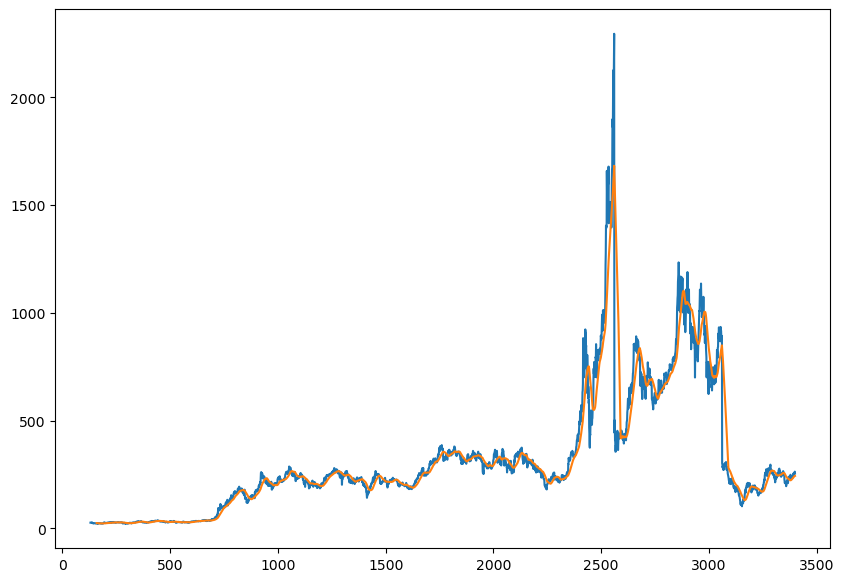

In [28]:
TSLA_11_23['open'].plot(figsize=(10, 7))
TSLA_11_23.rolling(window=30).mean()['close'].plot()

In [29]:
# Using Max Method we find Maximum Value
print("******************************* Showing Max Values ********************************")
print(TSLA_11_23['open'].max(),"||", TSLA_11_23['close'].max(), "||", TSLA_11_23['high'].max(), "||", TSLA_11_23['low'].max(), 
      TSLA_11_23['adjusted_close'].max(), "||", TSLA_11_23['volume'].max())

******************************* Showing Max Values ********************************
2295.12 || 2238.75 || 2318.49 || 2186.52 409.97 || 306590594


In [30]:
# Using Min Method we find Minimum Value

print("******************************* Showing Minimum Values ********************************")
print(TSLA_11_23['open'].min(),"||", TSLA_11_23['close'].min(), "||", TSLA_11_23['high'].min(), "||", TSLA_11_23['low'].min(), 
      TSLA_11_23['adjusted_close'].min(), "||", TSLA_11_23['volume'].min())

******************************* Showing Minimum Values ********************************
21.78 || 21.8301 || 22.2699 || 21.1101 1.4553 || 239595


In [31]:
bl_col = TSLA_11_23.select_dtypes(include=('boolean')).columns
int_col = TSLA_11_23.select_dtypes(include=('int')).columns
str_col = TSLA_11_23.select_dtypes(include=('object')).columns

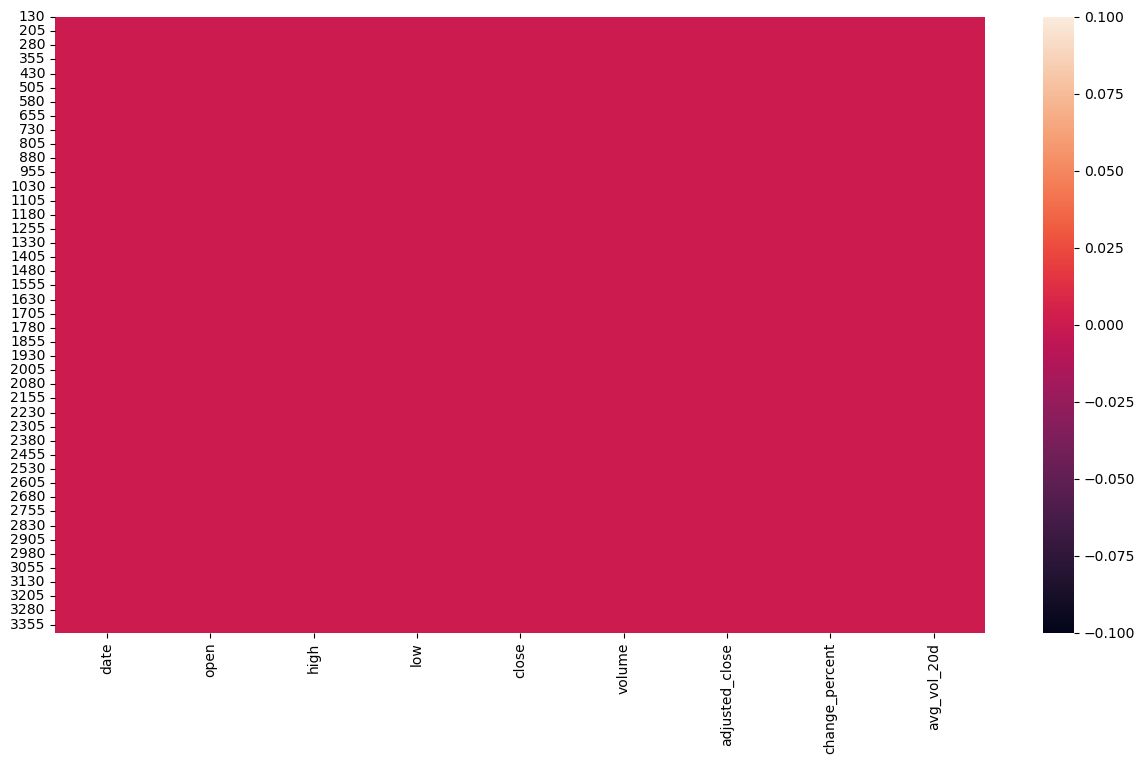

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(TSLA_11_23.isnull())
plt.show()

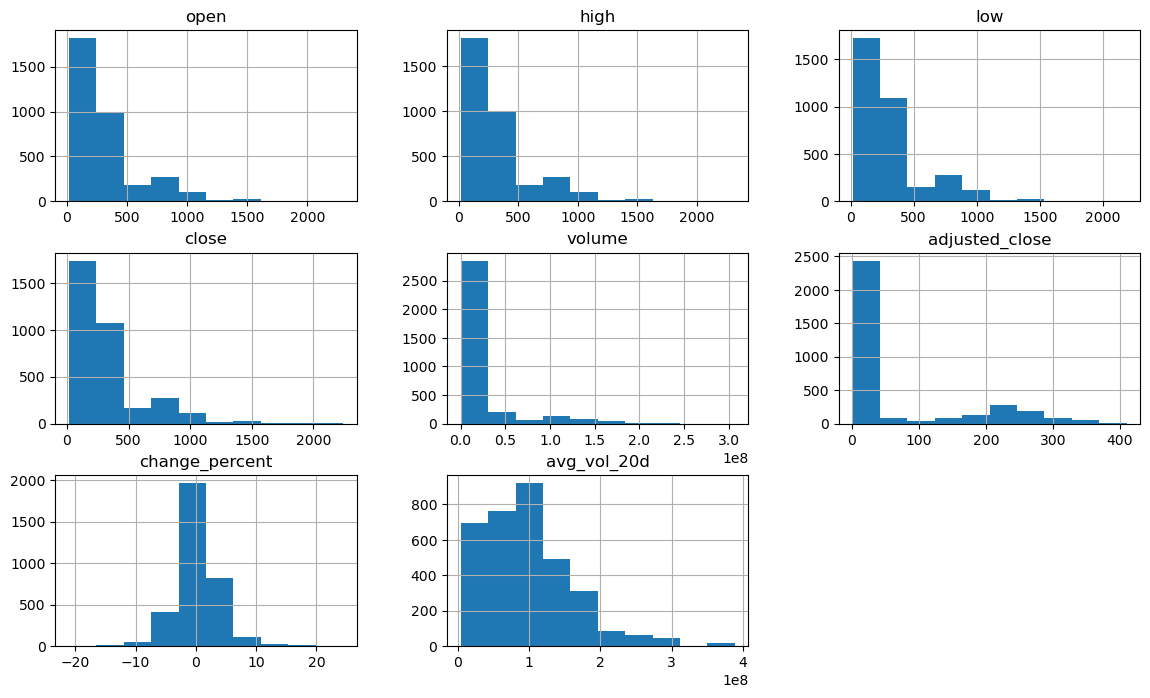

In [33]:
TSLA.hist(figsize=(14, 8))
plt.show()

In [34]:
TSLA_11_23.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

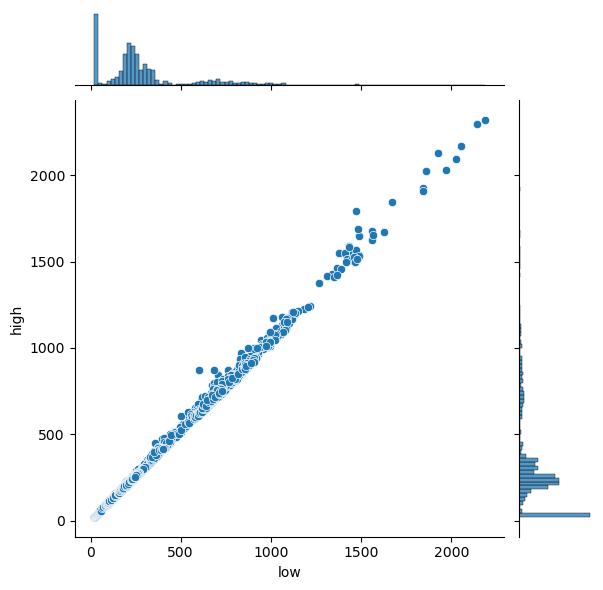

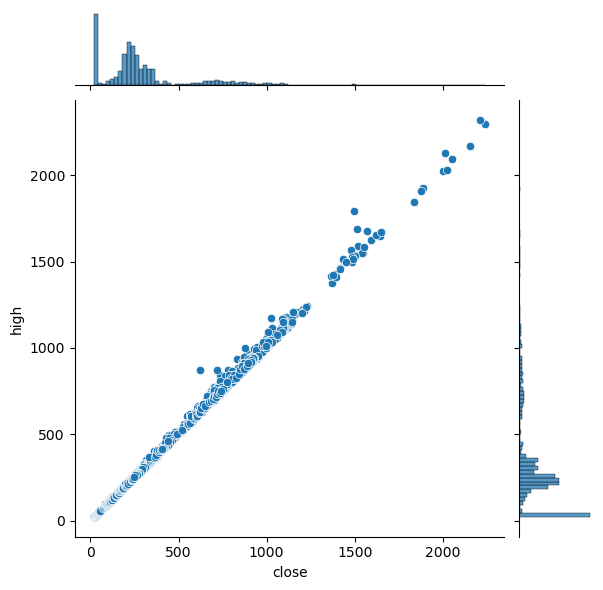

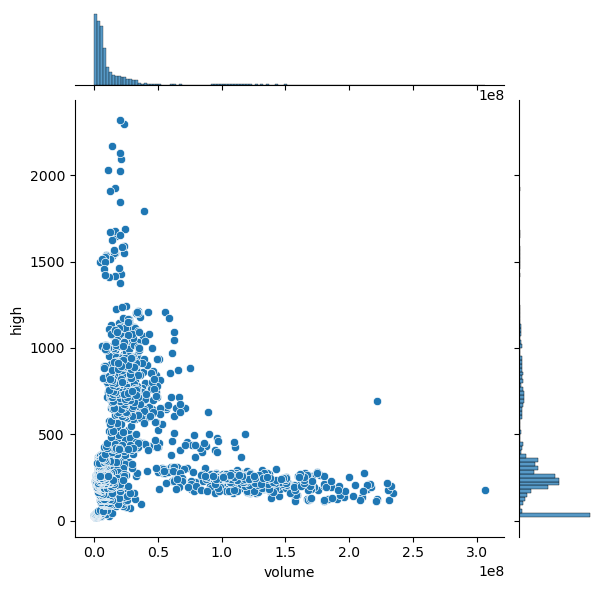

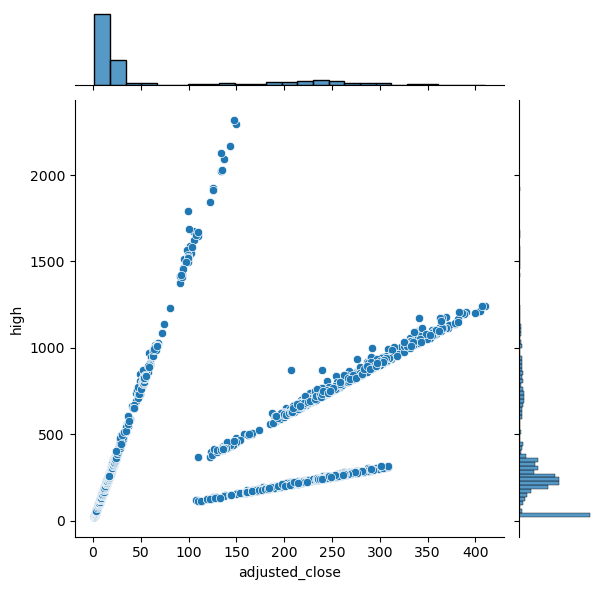

In [35]:
sns.jointplot(data=TSLA_11_23, x='low', y='high')
sns.jointplot(data=TSLA_11_23, x='close', y='high')
sns.jointplot(data=TSLA_11_23, x='volume', y='high')
sns.jointplot(data=TSLA_11_23, x='adjusted_close', y='high')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


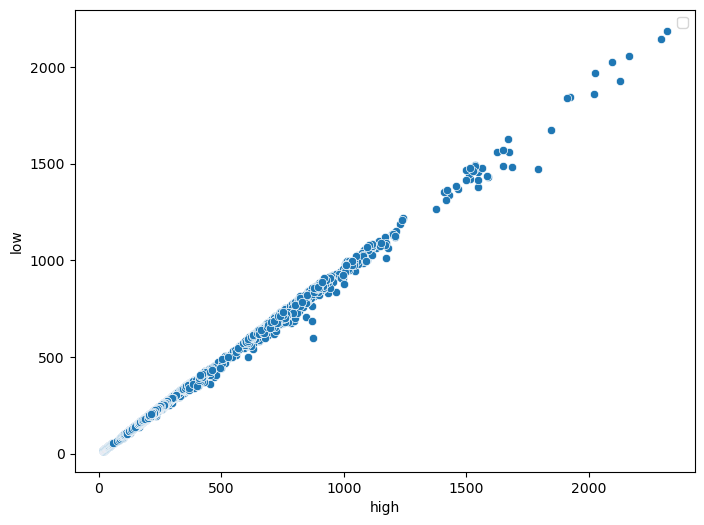

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='high', y='low', data=TSLA)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


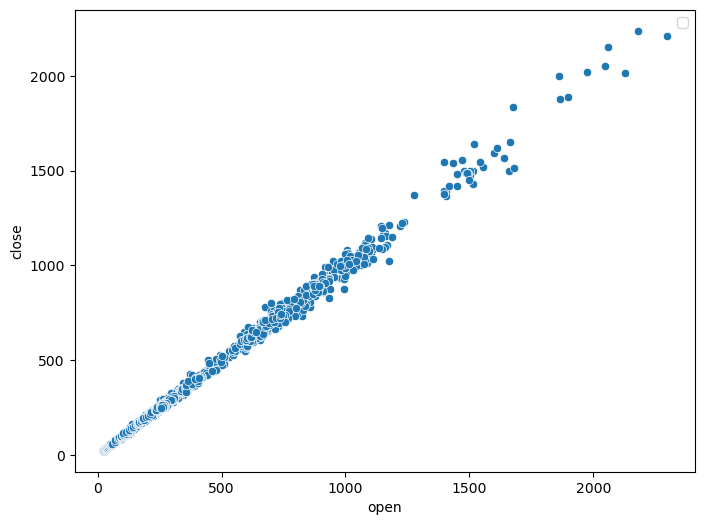

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='open', y='close', data=TSLA_11_23)
plt.legend()
plt.show()